In [21]:
import pandas as pd
import dask.dataframe as dd

df_ellipsoid = dd.read_csv("../VoxelsDataset/ellipsoidVoxels/*").compute()
df_cuboid = dd.read_csv("../VoxelsDataset/cuboidVoxelsNoOrigin/*").compute()


In [22]:
import numpy as np

df = pd.concat([df_cuboid, df_ellipsoid]).reset_index(drop=True).replace([np.inf, -np.inf], np.nan).dropna()

df.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,390,391,392,393,394,395,396,397,398,399
count,19977.000000,19977.000000,19977.000000,19977.000000,19977.000000,19977.000000,19977.000000,19977.000000,19977.000000,19977.000000,...,19977.000000,19977.000000,19977.000000,19977.000000,19977.000000,19977.000000,19977.000000,19977.000000,19977.000000,19977.000000
mean,4999.380538,-2.624450,-2.627009,-2.467638,-2.482144,-2.503178,-2.528267,-2.561485,-2.601894,-2.645615,...,-2.848823,-2.799576,-2.749746,-2.715502,-2.681349,-2.656697,-2.633264,-2.620443,-2.612182,-2.610249
std,2886.563478,9.600954,9.600149,23.261088,23.261366,23.261995,23.261567,23.262995,23.265073,23.265571,...,9.583537,9.580887,9.573215,9.575772,9.571079,9.571859,9.566827,9.570686,9.570883,9.571362
min,0.000000,-32.557019,-31.527761,-32.568745,-32.583592,-32.604459,-31.649855,-32.664419,-32.703622,-31.917769,...,-32.802900,-31.918165,-31.814147,-32.665778,-31.650095,-31.601606,-31.567036,-32.569195,-31.527706,-32.557019
25%,2500.000000,-9.823764,-9.825959,-9.800540,-9.810716,-9.829357,-9.854854,-9.889650,-9.930916,-9.972341,...,-10.022957,-9.978890,-9.928891,-9.901434,-9.861759,-9.837799,-9.816295,-9.800547,-9.796642,-9.793906
50%,4998.000000,-0.509231,-0.512085,-0.519388,-0.532809,-0.554133,-0.581702,-0.618166,-0.657786,-0.699056,...,-0.754296,-0.702706,-0.658241,-0.620544,-0.587983,-0.556747,-0.536008,-0.521329,-0.513240,-0.511995
75%,7500.000000,5.043975,5.040669,5.031524,5.014467,4.992862,4.966729,4.932809,4.892132,4.850816,...,4.794146,4.846293,4.891636,4.928398,4.961911,4.986674,5.012179,5.028231,5.040040,5.040257
max,9999.000000,14.467264,14.464933,2993.838142,2993.838142,2993.838142,2993.838142,2993.838142,2993.838142,2993.838142,...,14.278559,14.318148,14.353087,14.383373,14.409003,14.429976,14.446289,14.457942,14.464934,14.467264


In [3]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :400]
Y = df.iloc[:, 400:]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.5, random_state = 42)

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_val = ss.transform(x_val)
x_test = ss.transform(x_test)


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import SGD, Adam


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=50, verbose=1,)
early_stop = EarlyStopping(monitor='val_loss', patience=61, verbose=1, restore_best_weights=True)
opt = Adam()

model = Sequential()
model.add(Dense(100, input_dim=400, kernel_initializer='normal', activation='relu'))
model.add(Dense(1331, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'], )
model.summary()

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_2 (Dense)              (None, 1331)              134431    
Total params: 174,531
Trainable params: 174,531
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x=x_train, y=y_train, validation_data = (x_val, y_val), epochs=1000, verbose=1, callbacks=[early_stop, reduce_lr])

 val_accuracy: 0.9981

Epoch 00767: ReduceLROnPlateau reducing learning rate to 0.00017797851614886895.
Epoch 768/1000
4994/4994 [==============================] - 1s 175us/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9981
Epoch 769/1000
4994/4994 [==============================] - 1s 182us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9984
Epoch 770/1000
4994/4994 [==============================] - 1s 176us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9984
Epoch 771/1000
4994/4994 [==============================] - 1s 186us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9984
Epoch 772/1000
4994/4994 [==============================] - 1s 178us/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9982
Epoch 773/1000
4994/4994 [==============================] - 1s 185us/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9

4994/4994 [==============================] - 0s 62us/step
[0.004320175977480479, 0.9985394477844238]


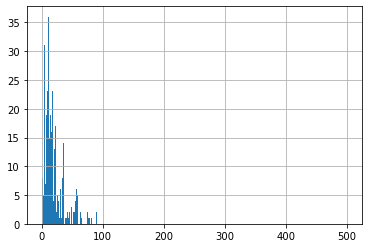

In [7]:
print(model.evaluate(x_val, y_val))

abs(np.round(model.predict(x_val)) - y_val).sum().hist(bins=range(1,500))

In [8]:
from sklearn.metrics import f1_score
y_pred = np.round(model.predict(x_val))
yf1 = [f1_score(y_val.iloc[:,i]*1, y_pred[:,i], zero_division=1) for i in range(1331)]

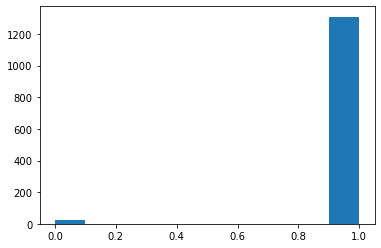

In [9]:
import matplotlib.pyplot as plt
plt.hist(yf1)
plt.show()

In [10]:
gridpoints = []
for z in np.linspace(-2,2,11):
  for y in np.linspace(-2,2,11):
    for x in np.linspace(-2,2,11):
      gridpoints.append((x,y,z))


In [11]:
import plotly.graph_objects as go
import numpy as np

prob_pred = model.predict(np.array([x_val[2]]))
pred = np.round(prob_pred)


fig = go.Figure(data=[
    go.Mesh3d(
        # 8 vertices of a cube
        x=np.array([[gridpoints[q][0]-0.2 for p in range(2)] + [gridpoints[q][0]+0.2 for p in range(2)] for p in range(2)]).flatten(),
        y=np.array([[gridpoints[q][1]-0.2] + [gridpoints[q][1]+0.2 for p in range(2)] + [gridpoints[q][1]-0.2] for p in range(2)]).flatten(),
        z=[gridpoints[q][2]-0.2 for p in range(4)] + [gridpoints[q][2]+0.2 for p in range(4)],
        i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
        j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
        k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
        color = 'green'
    )
 for q in range(1331) if (pred[0][q]==1)]
)


fig.show()


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
print(accuracy_score(np.round((model.predict(x_train)*1)).flatten(), np.array(y_train*1).flatten()))
print(precision_score(np.round((model.predict(x_train)*1)).flatten(), np.array(y_train*1).flatten()))
print(recall_score(np.round((model.predict(x_train)*1)).flatten(), np.array(y_train*1).flatten()))

0.9992679419661219
0.9960162852855818
0.9962320964838212


In [13]:
print(accuracy_score(np.round((model.predict(x_val)*1)).flatten(), np.array(y_val*1).flatten()))
print(precision_score(np.round((model.predict(x_val)*1)).flatten(), np.array(y_val*1).flatten()))
print(recall_score(np.round((model.predict(x_val)*1)).flatten(), np.array(y_val*1).flatten()))

0.9985394945760607
0.992145799351354
0.9924481464786586


In [14]:
print(accuracy_score(np.round((model.predict(x_test)*1)).flatten(), np.array(y_test*1).flatten()))
print(precision_score(np.round((model.predict(x_test)*1)).flatten(), np.array(y_test*1).flatten()))
print(recall_score(np.round((model.predict(x_test)*1)).flatten(), np.array(y_test*1).flatten()))

0.9983604805255729
0.9914967648921856
0.9911816606508521


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

#Logistic Regression Doesn't Acc
lr = MultiOutputClassifier(LogisticRegression(max_iter=4000), n_jobs=-1)

columns2 = y_train.T.loc[y_train.nunique()==2].index
columns1 = y_train.T.loc[y_train.nunique()==1].index
y_train[columns2]


lr.fit(x_train, y_train[columns2])

MultiOutputClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=4000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                      n_jobs=-1)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = pd.DataFrame(lr.predict(x_train), columns = columns2)
for i in columns1:
  y_pred[i] = y_train[i].mean()

print(accuracy_score(np.array(y_pred*1).flatten(), np.array(y_train*1).flatten()))
print(precision_score(np.array(y_pred*1).flatten(), np.array(y_train*1).flatten()))
print(recall_score(np.array(y_pred*1).flatten(), np.array(y_train*1).flatten()))

0.829133803539454
0.09242823419973686
0.09299228523168343


In [17]:
y_pred = pd.DataFrame(lr.predict(x_val), columns = columns2)

for i in columns1:
  y_pred[i] = y_train[i].mean()

print(accuracy_score(np.array(y_pred*1).flatten(), np.array(y_val*1).flatten()))
print(precision_score(np.array(y_pred*1).flatten(), np.array(y_val*1).flatten()))
print(recall_score(np.array(y_pred*1).flatten(), np.array(y_val*1).flatten()))

0.828827801475971
0.09432815643663643
0.09489884203905843


In [18]:
y_pred = pd.DataFrame(lr.predict(x_test), columns = columns2)

for i in columns1:
  y_pred[i] = y_train[i].mean()

print(accuracy_score(np.array(y_pred*1).flatten(), np.array(y_test*1).flatten()))
print(precision_score(np.array(y_pred*1).flatten(), np.array(y_test*1).flatten()))
print(recall_score(np.array(y_pred*1).flatten(), np.array(y_test*1).flatten()))

0.829029814087758
0.09417299104215694
0.09465157984287444


In [19]:
from plotly.subplots import make_subplots

def comparisonPlot(obj):

  prob_pred = model.predict(x_test)[obj]
  pred = np.round(prob_pred)
  print(prob_pred.mean())

  fig = make_subplots(
      rows=1, cols=2,
      specs=[[{'type': 'surface'}, {'type': 'surface'}]])

  for q in range(11**3):
    # adding surfaces to subplots.
  
    fig.add_trace(go.Mesh3d(
        # 8 vertices of a cube
        x=np.array([[gridpoints[q][0]-0.2 for p in range(2)] + [gridpoints[q][0]+0.2 for p in range(2)] for p in range(2)]).flatten(),
        y=np.array([[gridpoints[q][1]-0.2] + [gridpoints[q][1]+0.2 for p in range(2)] + [gridpoints[q][1]-0.2] for p in range(2)]).flatten(),
        z=[gridpoints[q][2]-0.2 for p in range(4)] + [gridpoints[q][2]+0.2 for p in range(4)],
        i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
        j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
        k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
        color = 'green',
        opacity = prob_pred[q],
        ),
        row = 1, col = 1,
    )

    
    fig.add_trace(go.Mesh3d(
          # 8 vertices of a cube
          x=np.array([[gridpoints[q][0]-0.2 for p in range(2)] + [gridpoints[q][0]+0.2 for p in range(2)] for p in range(2)]).flatten(),
          y=np.array([[gridpoints[q][1]-0.2] + [gridpoints[q][1]+0.2 for p in range(2)] + [gridpoints[q][1]-0.2] for p in range(2)]).flatten(),
          z=[gridpoints[q][2]-0.2 for p in range(4)] + [gridpoints[q][2]+0.2 for p in range(4)],
          i = [7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2],
          j = [3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 6, 3],
          k = [0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6],
          color = 'red',
          opacity = y_test.iloc[obj][q]*1
          ),
          row = 1, col = 2,
      )


  fig.update_layout(
      title_text='Accuracy = {0:.2%}'.format(model.evaluate(np.array([x_val[obj]]), np.array([y_val.iloc[obj]]))[1]),
  )
  fig.show()

comparisonPlot(300)

0.03403431
1/1 [==============================] - 0s 782us/step


In [20]:
comparisonPlot(400)

0.12163694
1/1 [==============================] - 0s 635us/step
